In [25]:
import pandas as pd
import numpy as np
import glob
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

result_path = 'RESULT/MEAN/*-*csv'
files = glob.glob(result_path) + ['RESULT/MEAN/bert.csv']
files = [x for x in files if 'avg' not in x]
files

result_path = 'RESULT/STD/*-*csv'
files_std = glob.glob(result_path) + ['RESULT/STD/bert.csv']
files_std = [x for x in files_std if 'avg' not in x]
files_std


['RESULT/STD/bert-zh.csv',
 'RESULT/STD/bert-large.csv',
 'RESULT/STD/bert-de.csv',
 'RESULT/STD/bert-es.csv',
 'RESULT/STD/bert.csv']

In [26]:
dfs={}
for file in files:
    dfs[file.split('/')[-1].replace('.csv','')] = pd.read_csv(file)

dfs_std={}
for file in files_std:
    dfs_std[file.split('/')[-1].replace('.csv','')] = pd.read_csv(file)

columns = ['NSP with 4 MC', 'Sent. Ordering', 'Discourse Connective',
       'Nuclearity', 'Relation', 'EDU segmentation']
models = ['bert', 'bert-large', 'bert-zh', 'bert-de', 'bert-es' ]
print(dfs.keys())

dict_keys(['bert-zh', 'bert-large', 'bert-de', 'bert-es', 'bert'])


In [28]:
model2index = {'bert-large': [0,0], 'bert': [0,1], 'bert-zh': [0,2],
       'bert-de': [1,1], 'bert-es': [1,2]}

col2color = {'NSP with 4 MC': 'red', 'Sent. Ordering': 'orange', 'Discourse Connective': 'blue', \
               'Nuclearity': 'green', 'Relation': 'black', 'EDU segmentation': '#46bdc6'}

model2title = {'bert-large': 'English (large)', 'bert': 'English', 'bert-zh': 'Chinese',
       'bert-de': 'German', 'bert-es': 'Spanish'}

col2line = {'NSP with 4 MC': '-', 'Sent. Ordering': '-', 'Discourse Connective': '--', \
               'Nuclearity': '-', 'Relation': '-.', 'EDU segmentation': '-'}

col2marker = {'NSP with 4 MC': 'x', 'Sent. Ordering': 'h', 'Discourse Connective': '', \
               'Nuclearity': '>', 'Relation': '', 'EDU segmentation': 'v'}

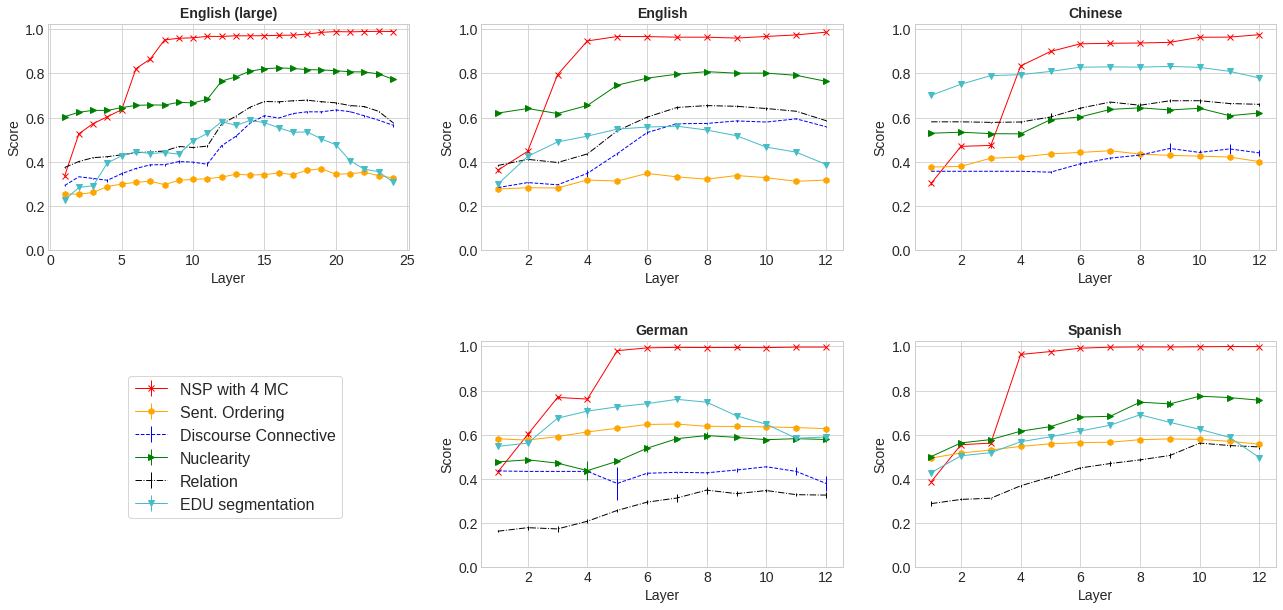

In [31]:
fig, ax = plt.subplots(2,3,figsize=(22,10))
fig.delaxes(ax[1][0])

fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.4)

for model in models:
    x,y = model2index[model]
    df = dfs[model]
    title = model2title[model]
    for col in columns:
        ax[x,y].errorbar(df['Layer'], df[col], yerr=dfs_std[model][col], color=col2color[col], label=col, linestyle=col2line[col], 
                     marker = col2marker[col], linewidth=1)
    ax[x,y].set_title(title, fontsize=14, fontweight='bold')
    ax[x,y].set_xlabel('Layer',fontsize=14)
    ax[x,y].set_ylabel('Score', fontsize=14)
    ax[x,y].set_ylim(ymin=0)
    ax[x,y].set_ylim(ymax=1.025)
    ax[x,y].tick_params(labelsize=14)
    
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.1,0.15), frameon=True, fontsize=16)
#plt.tick_params(labelsize=14)

plt.savefig('across_langs.pdf', bbox_inches='tight')